In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from IPython.testing import test




import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load Data -  Weather and air quality for each day
weather_df = pd.read_csv("/content/drive/MyDrive/Exam/london_weather.csv")
quality_df = pd.read_csv("/content/drive/MyDrive/Exam/air-quality-london-time-of-day.csv")

#display(weather_df)
#quality_df.head(2)


In [ ]:
# Data Cleaning
# Quality
df_qdate = quality_df.drop(columns='GMT') # drop time
df_qdate.fillna(0,inplace=True)  # fill NA
df_qdate['Month']=pd.to_datetime(df_qdate['Month'],yearfirst=True) # convert month col to date format

# Weather
df_w = weather_df
df_w.fillna(0,inplace=True)
#df_qdate

In [ ]:
# Mean quality for each month
df_qdate_gr = df_qdate.set_index('Month')
df_qdate_gr = df_qdate_gr.groupby(pd.Grouper(freq='D'))
df_qdate_mean = df_qdate_gr.mean()

df_qdate_mean.dropna(inplace=True)
#df_qdate_mean

In [ ]:
# Fix date format issue (from yyyy-dd-mm to yyyy-mm-dd)
date_month = pd.date_range(start='2008-01-01', end='2019-07-01', freq='MS') # genrate new date col for each month
df_qdate_mean['date'] = date_month
df_qdate_mean.set_index('date',inplace=True)
#df_qdate_mean

In [ ]:
# Fix date format issue
date_range = pd.date_range(start='1979-01-01', end='2020-12-31', freq='D')
weather_df['date2'] = date_range

weather_df_new = weather_df.drop(columns='date')

# mean of weather
weather_df_new.set_index('date2',inplace=True)
df_wdate_gr = weather_df_new.groupby(pd.Grouper(freq='M'))
df_wdate_mean = df_wdate_gr.mean()

date_range_month = pd.date_range(start='1979-01-01', end='2020-12-01', freq='MS')
print(date_range_month.size)
df_wdate_mean['date'] = date_range_month
df_wdate_mean.set_index('date',inplace=True)


#display(df_wdate_mean)



504


In [ ]:
# merge both ds based on date
df_merge = pd.merge(df_qdate_mean, df_wdate_mean, left_index=True, right_index=True)
df_merge.reset_index(inplace=True)

# Add columns for total roadside pollution and background pollution

df_merge['Total Roadside'] = df_merge.iloc[:,1:8].sum(axis=1)
df_merge['Total Background'] = df_merge.iloc[:,8:14].sum(axis=1)
df_merge.head(2)

,date,London Mean Roadside:Nitric Oxide (ug/m3),London Mean Roadside:Nitrogen Dioxide (ug/m3),London Mean Roadside:Oxides of Nitrogen (ug/m3),London Mean Roadside:Ozone (ug/m3),London Mean Roadside:PM10 Particulate (ug/m3),London Mean Roadside:PM2.5 Particulate (ug/m3),London Mean Roadside:Sulphur Dioxide (ug/m3),London Mean Background:Nitric Oxide (ug/m3),London Mean Background:Nitrogen Dioxide (ug/m3),...,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Total Roadside,Total Background
0,2008-01-01,0.0,55.5125,0.0,29.512500,24.970833,14.675,4.216667,0.0,42.345833,...,1.941935,30.419355,10.412903,7.390323,4.709677,2.225806,101234.516129,0.0,128.887500,101.679167
1,2008-02-01,0.0,75.9250,0.0,20.316667,39.487500,28.775,7.554167,0.0,60.241667,...,4.482759,67.137931,10.989655,6.500000,2.031034,0.531034,102306.551724,0.0,172.058333,125.275000


In [ ]:
df_roadside = df_merge.iloc[:,14:24]
df_bckgrnd = df_merge.iloc[:,14:23]
df_bckgrnd['Total Background'] = df_merge.iloc[:,24]
df_roadside.head(2)

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Total Roadside
0,5.419355,1.941935,30.419355,10.412903,7.390323,4.709677,2.225806,101234.516129,0.0,128.887500
1,3.724138,4.482759,67.137931,10.989655,6.500000,2.031034,0.531034,102306.551724,0.0,172.058333


In [ ]:

df_bckgrnd['date'] = df_merge['date']
df_bckgrnd.set_index('date', inplace=True)
display(df_bckgrnd.head(2))

df_roadside['date'] = df_merge['date']
df_roadside.set_index('date', inplace=True)
display(df_roadside.tail(2))


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Total Background
date,,,,,,,,,,
2008-01-01,5.419355,1.941935,30.419355,10.412903,7.390323,4.709677,2.225806,101234.516129,0.0,101.679167
2008-02-01,3.724138,4.482759,67.137931,10.989655,6.500000,2.031034,0.531034,102306.551724,0.0,125.275000


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Total Roadside
date,,,,,,,,,,
2019-06-01,5.433333,5.670000,166.266667,21.670000,16.893333,11.923333,2.726667,101446.333333,0.0,188.4875
2019-07-01,4.806452,6.274194,191.290323,25.574194,20.180645,14.909677,1.638710,101598.387097,0.0,193.1625


#Roadside Forecast

In [ ]:
train_end_date = '2017-02-01'  # End date for training
test_start_date = '2017-02-01'  # Start date for testing

# Split the data into training and testing sets
train_data = df_roadside.loc[:train_end_date]
test_data = df_roadside.loc[test_start_date:]


64
Best RMSE: 27.81034907312755
Best Order: (1, 0, 0)
Best Seasonal Order: (1, 0, 1, 12)


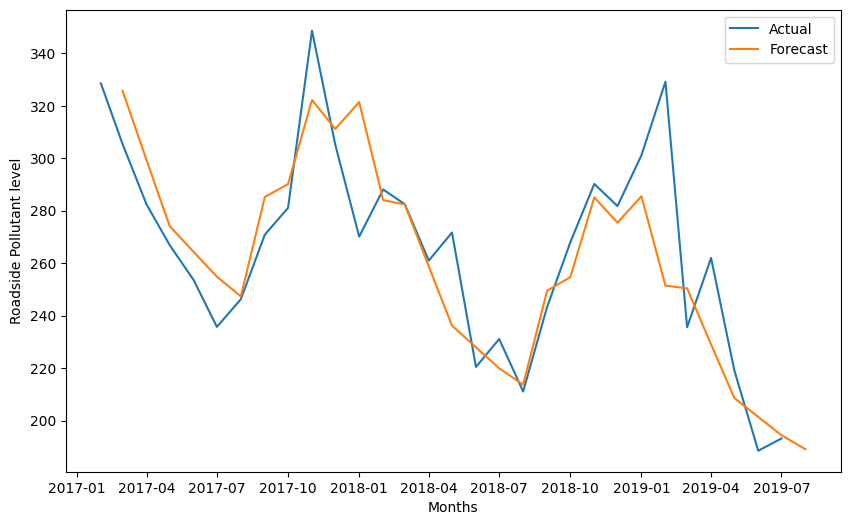

In [ ]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Manual gridsearch for hyperparameter tuning

p_values = [0, 1]
d_values = [0, 1]
q_values = [0, 1]
P_values = [0, 1]
D_values = [0, 1]
Q_values = [0, 1]
S_values = [12]  # Seasonal period
# List of all possible combinations of hyperparameters
hyperparameter_combinations = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values))
print(len(hyperparameter_combinations))

best_rmse = float("inf")
best_order = None
best_seasonal_order = None
best_predicted_values = None
c=0
# Iterate through all hyperparameter combinations
for comb in hyperparameter_combinations:
  for order in [(comb[0],comb[1],comb[2])]:
    for seasonal_order in [(comb[3], comb[4], comb[5], S_values[0])]:
        try:
            model = sm.tsa.SARIMAX(train_data['Total Roadside'], order=order, seasonal_order=seasonal_order)
            results = model.fit()
            forecast = results.get_forecast(steps=len(test_data['Total Roadside']))
            predicted_values = forecast.predicted_mean
            rmse = np.sqrt(mean_squared_error(test_data['Total Roadside'], predicted_values))

            if rmse < best_rmse:
                best_rmse = rmse
                best_order = order
                best_seasonal_order = seasonal_order
                best_predicted_values = predicted_values
        except:
            continue

print("Best RMSE:", best_rmse)
print("Best Order:", best_order)
print("Best Seasonal Order:", best_seasonal_order)

plt.figure(figsize=(10, 6))
plt.plot(test_data['Total Roadside'], label='Actual')
plt.plot(best_predicted_values, label='Forecast')
plt.ylabel("Roadside Pollutant level")
plt.xlabel("Months")
plt.legend()
plt.show()


#Background Forecast

In [ ]:
train_end_date = '2017-02-01'  # End date for training
test_start_date = '2017-02-01'  # Start date for testing

# Split the data into training and testing sets
train_data = df_bckgrnd.loc[:train_end_date]
test_data = df_bckgrnd.loc[test_start_date:]


64
Best RMSE: 18.67739903014712
Best Order: (0, 1, 0)
Best Seasonal Order: (1, 0, 1, 12)


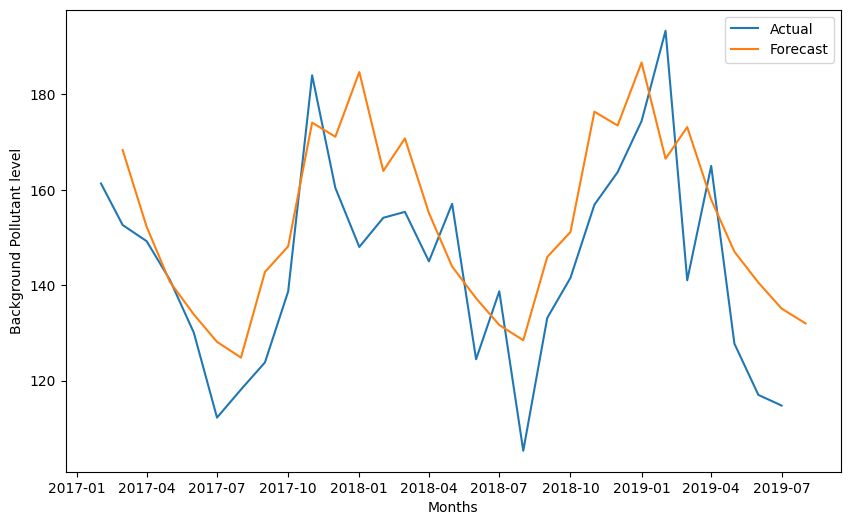

In [ ]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Manual gridsearch for hyperparameter tuning

p_values = [0, 1]
d_values = [0, 1]
q_values = [0, 1]
P_values = [0, 1]
D_values = [0, 1]
Q_values = [0, 1]
S_values = [12]  # Seasonal period
# List of all possible combinations of hyperparameters
hyperparameter_combinations = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values))
print(len(hyperparameter_combinations))
best_rmse = float("inf")

best_order = None
best_seasonal_order = None
best_predicted_values = None
c=0
# Iterate through all hyperparameter combinations
for comb in hyperparameter_combinations:
  for order in [(comb[0],comb[1],comb[2])]:
    for seasonal_order in [(comb[3], comb[4], comb[5], S_values[0])]:
        try:
            model = sm.tsa.SARIMAX(train_data['Total Background'], order=order, seasonal_order=seasonal_order)
            results = model.fit()
            forecast = results.get_forecast(steps=len(test_data['Total Background']))
            predicted_values = forecast.predicted_mean
            rmse = np.sqrt(mean_squared_error(test_data['Total Background'], predicted_values))

            if rmse < best_rmse:
                best_rmse = rmse

                best_order = order
                best_seasonal_order = seasonal_order
                best_predicted_values = predicted_values
        except:
            continue

print("Best RMSE:", best_rmse)
print("Best Order:", best_order)
print("Best Seasonal Order:", best_seasonal_order)
#print("best_prde:",best_predicted_values)

plt.figure(figsize=(10, 6))
plt.plot(test_data['Total Background'], label='Actual')
plt.plot(best_predicted_values, label='Forecast')
plt.ylabel("Background Pollutant level")
plt.xlabel("Months")
plt.legend()
plt.show()
